Libraries

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

Data

In [190]:
y = load_digits()
x = y.data


Closest Centroids

In [191]:
def find_closest_centroids(X, centroids):

    idx = np.zeros(X.shape[0], dtype=int)
    distances = np.linalg.norm(X[:, np.newaxis, :]-centroids, axis=-1)
    idx = np.argmin(distances, axis=1)

    return idx

New Centroids

In [192]:
def compute_centroids(X, idx, centroids,k):
    for i in range(k):
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

KMeans

In [193]:
def run_kMeans(X, max_iters,k):
    n,d=X.shape
    centroids=X[np.random.choice(n, k, replace=False)]
    for i in range(max_iters):
        idx=find_closest_centroids(X, centroids)
        centroids=compute_centroids(X, idx,centroids,k)
    return centroids, idx

Accuracy

In [194]:
a,b=run_kMeans(x,100,10)
print("Accuracy =",np.mean(y.target==b)*100,"%")

Accuracy = 18.64218141346689 %


## Image compression with K-means

##### Original Image

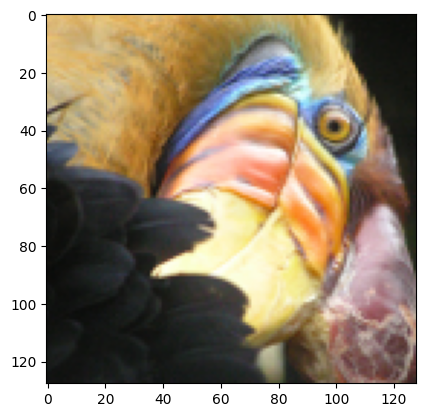

In [195]:
original_img = plt.imread('1.png')
plt.imshow(original_img)
plt.show()

In [196]:
# gives the blue intensity of the pixel at row 50 and column 33.
original_img[50, 33, 2]

0.19607843

In [197]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


#### KMeans

In [209]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
print("Shape of X_img is:", X_img.shape)

Shape of X_img is: (16384, 3)


In [199]:
centroids, idx = run_kMeans(X_img, 16,5)

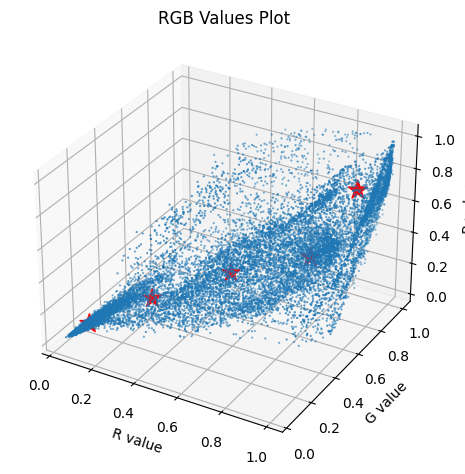

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_img[:,0],X_img[:,1],X_img[:,2],s=0.3)
ax.set_xlabel('R value')
ax.set_ylabel('G value')
ax.set_zlabel('B value')
ax.set_title('RGB Values Plot')
ax.scatter(centroids[:, 0], centroids[
           :, 1], centroids[:, 2], s=200, alpha=1,marker='*', c='red')
fig.tight_layout()
plt.show()

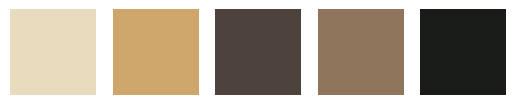

In [230]:
fig, axs = plt.subplots(1, len(centroids))
for i in range(len(images)):
    axs[i].imshow(centroids[i].reshape(1,1,3))
    axs[i].axis('off')
plt.show()


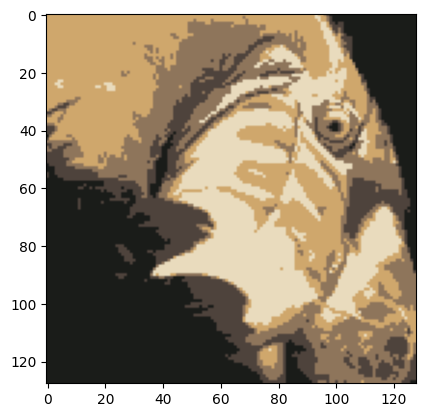

In [211]:
X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape) 

plt.imshow(X_recovered)